Load data

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\denissmi\Miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\denissmi\Miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

Vectorize data

In [2]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Define model

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Compile model

In [4]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Create test case

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Learn model

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5277 - accuracy: 0.7761 - val_loss: 0.4044 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3168 - accuracy: 0.9021 - val_loss: 0.3094 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2292 - accuracy: 0.9243 - val_loss: 0.2798 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1810 - accuracy: 0.9397 - val_loss: 0.2854 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1484 - accuracy: 0.9519 - val_loss: 0.2784 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1265 - accuracy: 0.9591 - val_loss: 0.2973 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1027 - accuracy: 0.9701 - val_loss: 0.3231 - val_accuracy: 0.8773
Epoch 8/20
30

Plot training and validation loss

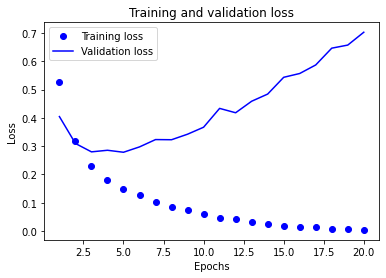

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Plot training and validation accuracy

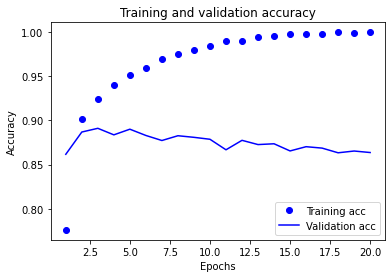

In [8]:
plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Result

In [9]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7532 - accuracy: 0.8492


[0.7531828284263611, 0.8492400050163269]

Predict

In [10]:
model.predict(x_test)

array([[0.01191872],
       [0.9999993 ],
       [0.99593174],
       ...,
       [0.00700068],
       [0.03162137],
       [0.97550786]], dtype=float32)